# <div style="background-color:lightblue; text-align:center; vertical-align: middle; padding:40px 0;"><p style="font-family: Arial; font-size:1em; color:BLACK; text-align: center;"> Image Classification using Keras Deep Learning Python Library </p></div>

# <p style="font-family: Arial; font-size:1.1em;color:#3498DB;"> Overview</p>

* The intent of the classification process is to categorize all pixels in a digital image into one of several land cover classes, or "themes". This categorized data may then be used to produce thematic maps of the land cover present in an image. The objective of image classification is to identify and portray, as a unique gray level (or color), the features occurring in an image in terms of the object or type of land cover these features actually represent on the ground.

* This project will focus on algorithmical methods, exactly Deep learning algorithms which are widely used in information science and computer science. I will apply classification algorithms on image dataset, which has a collection of different images, collected from different image types. 

* With supervised classification, we identify examples of the Information classes (i.e., land cover type) of interest in the image. These are called "training sites". The image processing software system is then used to develop a statistical characterization of the reflectance for each information class. This stage is often called "signature analysis" and may involve developing a characterization as simple as the mean or the rage of reflectance on each bands, or as complex as detailed analyses of the mean, variances and covariance over all bands. Once a statistical characterization has been achieved for each information class, the image is then classified by examining the reflectance for each pixel and making a decision about which of the signatures it resembles most. 

# <p style="font-family: Arial; font-size:1em;color:#3498DB;"> Problem Statement </p> 
### <div style="background-color:#f2f2f2; text-align:center; vertical-align: middle; padding:40px 0;"><p>The task is to train a convolutional neural net in keras for classifying 10 categories images.</p></div>




* The data consists of images pertaining to 10 categories. The task is to train a convolutional neural net in keras for classifying these images. With the advent of networks like Alexnet, VGG, Inception etc., building an architecture is no more an issue for generic classification tasks. The purpose here is to get familiar with Convolutional Architectures, Keras API & hyper parameter tuning and validating the results.
* The classification of 10_categories dataset is a supervised classification problem, there are 10 image categories, test image of these belongs to one category, the goal is to extract proper features and build an effective model to assign test image to the correct category.
* I will explore the dataset in the beginning on the training part, several classfication methods to do classification, compare the efficiency of these classifiers on the testing data and choose one as final model.

# <p style="font-family: Arial; font-size:1em;color:#3498DB;"> Project description </p> 

* This case study shows how to create a model for image classification and automatically classify image category.

* What will you find inside:
    * How to clean and prepare train images it to make it valuable for Deep learning scenarios.
    * How to create a classification model using Python modules like:  sklearn, keras, matplotlib, pandas.

# <font style=color:#3498DB;>Data </font>

### About this Dataset
    
* This image dataset is an established computer-vision dataset used for object recognition. The image data consists of 3725 (32×32) color images in 10 classes, with differenr images per class. 

    * airplane - 800

    * BACKGROUND_Google- 468 

    * bonsai - 128

    * car_side - 123

    * Faces - 435

    * Faces_easy - 435

    * grand_piano - 99

    * Leopards - 200

    * Motorbikes - 798

    * watch - 239
    


### Train image

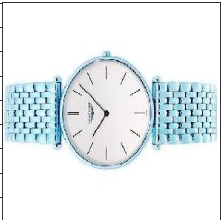

### Test image

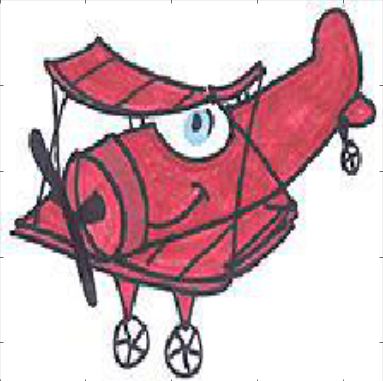

#### Content
   * There is folder (10_categories) that contains train images. 
   * There is jpg image(test_image-1551435475921 2.jpg) for test image.



# <font color='#3498DB'> Implemented Models </font>




<a name="(1)-CNN-Model1"></a>[<p style="font-size:1.5em;"><font color='darkblue'>(1) CNN Model1</font></p>](#(1)-CNN-Model1)

<a name="(2)-CNN-Model2"></a>[<p style="font-size:1.5em;"><font color='darkblue'>(2) CNN Model2</font></p>](#(2)-CNN-Model2)

<a name="(3)-ImageDataGenerator-Augmentation"></a>[<p style="font-size:1.5em;"><font color='darkblue'>(3) ImageDataGenerator Augmentation
    </font></p> ](#(3)-ImageDataGenerator-Augmentation)

<a name="(4)-Alexnet-Model"></a>[<p style="font-size:1.5em;"><font color='darkblue'>(4) Alexnet Model</font></p>](#(4)-Alexnet-Model)

<a name="(5)-VGG"></a>[<p style="font-size:1.5em;"><font color='darkblue'>(5) VGG</font></p>](#(5)-VGG)

<a name="(6)-RESNET"></a>[<p style="font-size:1.5em;"><font color='darkblue'>(6) RESNET</font></p>](#(6)-RESNET)




# <font color='#3498DB'> Metrics </font>


<b>accuracy:</b>  
The proportion of correct labels that we made if we apply our model to the training dataset. Ideal accuracy is 100%.

# Import Data and basic data manipulation

## Import Needed libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


import tensorflow as tf
import numpy as np
import pandas as pd
import os
os.getcwd()
from keras.models import Sequential 
from keras.layers import Activation, Dense, Dropout
from keras.layers import Convolution2D, MaxPooling1D 
from keras.optimizers import Adam, SGD, RMSprop
#from keras import utils as np_utils
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical



from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib
matplotlib.use("Agg")
import theano
from PIL import Image
from numpy import *
from sklearn.utils import shuffle
from keras.layers import Flatten
import cv2

import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

Using TensorFlow backend.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


### current working Directory

In [2]:
os.chdir('/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/CUTE 4')



### get working directory

In [3]:
os.getcwd()

'/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/CUTE 4'

In [ ]:
#os.chdir('/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/CUTE 4/10_categories 2')



### Read train dataset 

In [4]:
Image_path = os.path.join('/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/CUTE 4/10_categories 2')
image_dir_labels = os.listdir(Image_path)
image_dir_labels

['airplanes',
 'BACKGROUND_Google',
 'bonsai',
 'car_side',
 'Faces',
 'Faces_easy',
 'grand_piano',
 'Leopards',
 'Motorbikes',
 'watch']

## Understanding The Train Dataset


In [7]:
#get list of all images
imagenet_mean = np.array([104., 117., 124.], dtype=np.float32)

current_dir = os.getcwd()
image_dir = os.path.join(current_dir, '10_categories 2')




In [8]:
#get list of all images
img_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpeg')]



In [9]:
#load all images
imgs = []
for f in img_files:
    imgs.append(cv2.imread(f))
#plot images
fig = plt.figure(figsize=(15,6))
for i, img in enumerate(imgs):
    fig.add_subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

<Figure size 1080x432 with 0 Axes>

### Define img_rows, img_cols, num_channel

In [10]:
img_rows=224
img_cols=224
num_channel=3

### loading images from each 10 folder

In [11]:
img_data_list=[]
classes_names_list=[]


for dataset in image_dir_labels:
    classes_names_list.append(dataset) 
    print ('Loading images from {} folder\n'.format(dataset)) 
    img_list=os.listdir(Image_path +'/'+ dataset)
    #label = labels_name[dataset]

    for img in img_list:
        input_img=cv2.imread(Image_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(img_rows, img_cols),cv2.IMREAD_GRAYSCALE)
        img_data_list.append(input_img_resize)
        classes_names_list.append(img_list)




Loading images from airplanes folder

Loading images from BACKGROUND_Google folder

Loading images from bonsai folder

Loading images from car_side folder

Loading images from Faces folder

Loading images from Faces_easy folder

Loading images from grand_piano folder

Loading images from Leopards folder

Loading images from Motorbikes folder

Loading images from watch folder



### train below image

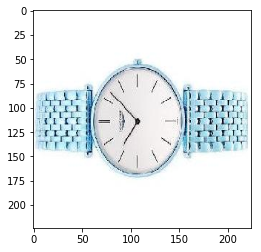

In [12]:
import matplotlib.pyplot as plt
plt.imshow(input_img_resize)  # graph it input_img_resize
plt.show()

In [13]:
num_labels = size(image_dir_labels)
print(num_labels)



10


In [14]:
num_classes = 10

labels_name={'airplanes':0,'BACKGROUND_Google':1,'bonsai':2,'car_side':3,'Faces':4,'Faces_easy':5,'grand_piano':6,'Leopards':7,'Motorbikes':8,'watch':9}




* total images in all 10 categorical folder 3725, with input shape

In [19]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

(3725, 224, 224, 3)


#### 224-Width,  224-Height,  3-no of channels

In [20]:
num_of_samples = img_data.shape[0]
num_of_samples




3725

In [21]:
input_shape = img_data[0].shape
input_shape  ##(224, 224, 3)--3D color image

(224, 224, 3)

* Define 10 categories with index values

In [23]:
classes = np.ones((num_of_samples,), dtype='int64')


classes[0:799]=0
classes[800:1267]=1
classes[1268:1395]=2
classes[1396:1518]=3
classes[1519:1953]=4
classes[1954:2388]=5
classes[2389:2487]=6
classes[2488:2687]=7
classes[2688:3485]=8
classes[3486:3724]=9

* Classes converted into categorical data type 

In [24]:
from keras.utils import to_categorical


# Assigning Labels

# Define the number of classes
num_classes = 10

# convert class labels to on-hot encoding
#Y = np_utils.to_categorical(classes, num_classes)
classes = to_categorical(classes, num_classes)

# Shuffle the dataset

In [25]:
#Shuffle the dataset
from sklearn.utils import shuffle

X, Y = shuffle(img_data, classes, random_state=2)

* Split the dataset with test size is 20%.

In [26]:
# Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)



Number transactions X_train dataset:  (2980, 224, 224, 3)
Number transactions y_train dataset:  (2980, 10)
Number transactions X_test dataset:  (745, 224, 224, 3)
Number transactions y_test dataset:  (745, 10)


# Model

# (1) CNN model

* A sequential model which is a linear stack of layers is used. 
* In Convolutional layer 32 is neuron size, 3 filter size.
* A dropout layer is applied after convolutional layer to avoid overfitting of the model. 
* Finally, we have the last layer as a fully connected layer with a ‘softmax’ activation and neurons equal to the number of unique characters, because we need to output one hot encoded result.

### Create the Model
The entire model consists of 8 layers in total. In addition to layers below lists what techniques are applied to build the model.

##### 1. Convolution with 32 different filters in size of (3x3)
   * Max Pooling by 2
        - ReLU activation function

#####  2. Convolution with 32 different filters in size of (3x3)
   * Max Pooling by 2
        - ReLU activation function

##### 3. Convolution with 64 different filters in size of (3x3)
   * Max Pooling by 2
        - ReLU activation function

##### 4. Convolution with 64 different filters in size of (3x3)
   * Max Pooling by 2
        - ReLU activation function


#####  5. Flattening the 3-D output of the last convolving operations.

##### 6. Fully Connected Layer with 64 units

#####  7. Fully Connected Layer with 64 units
   * 
       - Dropout

#####  8. Fully Connected Layer with 10 units (number of image classes)




In [28]:
# Defining the model
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
# 1, 2
model.add(Convolution2D(32, 3,3,activation='relu',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
# 3, 4
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
# 5, 
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# 6, 7
model.add(Dense(64))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#8
model.add(Dense(num_classes))
model.add(Activation('softmax'))
# the model so far outputs 3D feature maps (height, width, features)


### Cost Function & Optimizer
* Finally, you’ll define cost, optimizer, and accuracy.T he input tensor is the results of certain loss functions between predicted results and ground truths. Because this data has to measure loss over 10 classes, using softmax and categorical_crossentropy. 
* When training the network, what you want is minimize the cost by applying a algorithm of your choice, but AdamOptimizer works find for most cases in general.
* optimizer
    * Adam => An Operation that applies the specified gradients.



In [120]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=["accuracy"])

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 220, 220, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      18496     
__________

In [31]:
# Viewing model_configuration

model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable





True

In [32]:
history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test, y_test))

Train on 2980 samples, validate on 745 samples
Epoch 1/5
2980/2980 [==============================] - 1764s 592ms/step - loss: 2.0787 - acc: 0.3638 - val_loss: 1.6417 - val_acc: 0.3839
Epoch 2/5
2980/2980 [==============================] - 1337s 449ms/step - loss: 1.1351 - acc: 0.6087 - val_loss: 0.7139 - val_acc: 0.7906
Epoch 3/5
2980/2980 [==============================] - 1361s 457ms/step - loss: 0.8384 - acc: 0.7245 - val_loss: 0.5893 - val_acc: 0.8242
Epoch 4/5
2980/2980 [==============================] - 1427s 479ms/step - loss: 0.7238 - acc: 0.7658 - val_loss: 0.5243 - val_acc: 0.8698
Epoch 5/5
2980/2980 [==============================] - 1454s 488ms/step - loss: 0.5998 - acc: 0.7983 - val_loss: 1.1182 - val_acc: 0.6550


In [33]:
predi = model.predict(X_test)
predi[:10]

array([[3.87191959e-03, 1.89059392e-01, 6.41962737e-02, 7.39985029e-04,
        3.61931883e-02, 3.02101532e-03, 1.51996642e-01, 1.29505445e-03,
        1.03766374e-01, 4.45860147e-01],
       [8.06847254e-07, 3.31742363e-03, 4.54583700e-04, 6.23902565e-07,
        1.96665951e-05, 5.40744509e-07, 2.00015384e-05, 7.54200028e-06,
        9.96169627e-01, 9.10395920e-06],
       [2.74231464e-01, 1.77421659e-01, 1.30462646e-01, 3.33939195e-02,
        6.68856651e-02, 2.29631159e-02, 6.09951690e-02, 9.17366892e-02,
        5.48674539e-02, 8.70422125e-02],
       [8.58187452e-02, 1.55918732e-01, 1.58262417e-01, 7.24398345e-02,
        6.08155839e-02, 1.02893792e-01, 9.34379324e-02, 1.43806279e-01,
        5.23980446e-02, 7.42085353e-02],
       [1.29990210e-03, 4.71345752e-01, 1.85236156e-01, 1.01511774e-03,
        4.79142107e-02, 9.44671780e-03, 1.61616299e-02, 9.03394903e-05,
        2.81452667e-02, 2.39344865e-01],
       [7.45804980e-03, 1.25768527e-01, 1.07951373e-01, 7.42026372e-03,
   

In [34]:
# Evaluating the model

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 1.1181740129554032
Test accuracy: 0.6550335572069923


In [35]:
test_image = X_test[0:1]
print (test_image.shape)




(1, 224, 224, 3)


In [37]:

print(model.predict_classes(test_image))


[9]


In [48]:
np.argmax(predi[0])

9

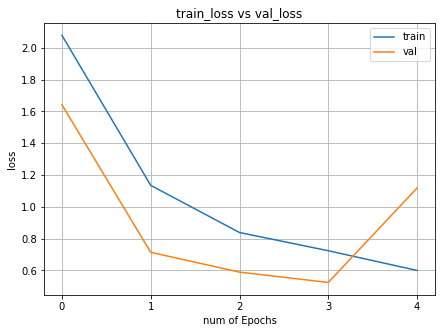

In [39]:
num_epoch = 5
# visualizing losses and accuracy
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['acc']
val_acc=history.history['val_acc']

xc=range(num_epoch)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])



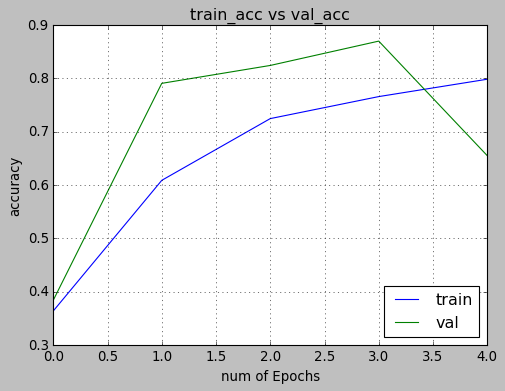

In [40]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

<p style="font-size:1em; color:blue; ">///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</p>

In [49]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



In [53]:
# Grab an image from the test dataset
img = test_image[0]

print(img.shape)

(224, 224, 3)


In [42]:
#Visualizing the intermediate layer
from keras import backend as K


#
def get_featuremaps(model, layer_idx, X_batch):
    get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
    activations = get_activations([X_batch,0])
    return activations

layer_num=3
filter_num=0

activations = get_featuremaps(model, int(layer_num),test_image1)

In [43]:
print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))



(1, 1, 220, 220, 32)
(220, 220, 32)


In [44]:
if K.image_dim_ordering()=='th':
    feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

(220, 220, 32)


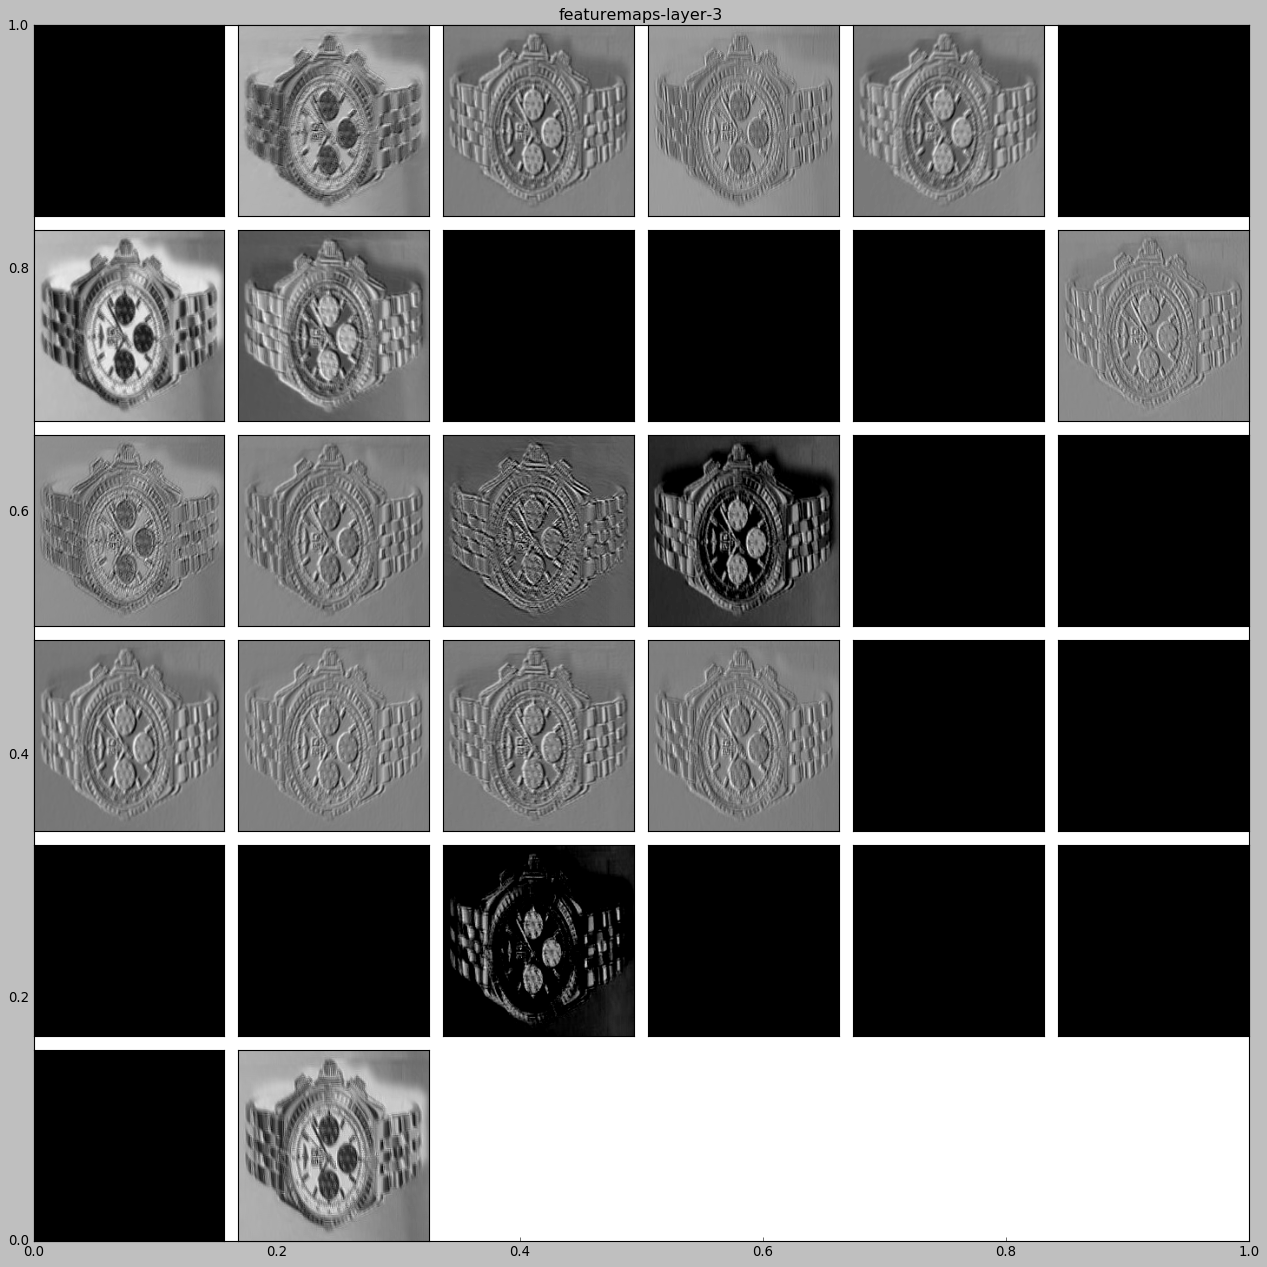

In [47]:
num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
    ax = fig.add_subplot(subplot_num, subplot_num, i+1)
#ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
    ax.imshow(feature_maps[:,:,i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')

In [60]:
# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0(airplanes)', 'class 1(BACKGROUND_Google)', 'class 2(bonsai)','class 3(car_side)','class 4(Faces)','class 5(Faces_easy)','class 6(grand_piano)','class 7(Leopards)','class 8(Motorbikes)','class 9(watch)']



[[3.87191959e-03 1.89059392e-01 6.41962737e-02 ... 1.29505445e-03
  1.03766374e-01 4.45860147e-01]
 [8.06847254e-07 3.31742363e-03 4.54583700e-04 ... 7.54200028e-06
  9.96169627e-01 9.10395920e-06]
 [2.74231464e-01 1.77421659e-01 1.30462646e-01 ... 9.17366892e-02
  5.48674539e-02 8.70422125e-02]
 ...
 [5.46954619e-03 3.70426476e-01 3.28849889e-02 ... 1.86792389e-03
  2.49756239e-02 9.78872459e-03]
 [5.87134506e-04 2.13207789e-02 7.83254486e-03 ... 5.57727704e-04
  1.40238204e-04 3.17724119e-03]
 [2.71510724e-02 1.48688838e-01 1.51866972e-01 ... 8.22242573e-02
  2.23475546e-02 5.65319881e-02]]
[9 8 0 2 1 8 1 5 8 8 2 7 1 1 1 7 8 0 8 5 1 2 1 2 5 1 1 8 1 5 5 7 5 1 1 1 5
 1 1 3 1 8 8 7 6 1 0 1 1 1 0 5 7 3 2 8 9 1 7 8 1 5 0 1 8 1 5 5 1 1 9 8 1 1
 1 1 8 2 1 8 0 2 1 1 8 8 4 0 8 1 1 1 1 4 0 5 1 1 8 2 8 0 1 0 8 7 1 1 8 5 5
 0 5 8 8 1 8 5 8 0 8 8 7 9 1 1 5 5 1 2 7 4 3 8 6 8 8 8 8 1 0 4 8 8 0 0 7 2
 8 2 1 0 1 1 5 5 5 1 1 1 2 1 8 3 5 8 1 1 0 1 1 6 6 1 1 5 5 8 3 8 1 1 0 7 0
 1 8 8 7 6 6 2 8 0 0 3 9 

In [61]:
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))



                            precision    recall  f1-score   support

        class 0(airplanes)       1.00      0.50      0.67       171
class 1(BACKGROUND_Google)       0.37      0.91      0.52        91
           class 2(bonsai)       0.26      0.62      0.37        21
         class 3(car_side)       0.48      0.55      0.51        22
            class 4(Faces)       1.00      0.20      0.33        92
       class 5(Faces_easy)       1.00      0.73      0.84        96
      class 6(grand_piano)       0.20      0.33      0.25        12
         class 7(Leopards)       0.62      0.80      0.70        40
       class 8(Motorbikes)       0.86      0.98      0.92       156
            class 9(watch)       0.89      0.39      0.54        44

                 micro avg       0.66      0.66      0.66       745
                 macro avg       0.67      0.60      0.56       745
              weighted avg       0.82      0.66      0.66       745

[[ 86  35   9   5   0   0   5  13  16   2]
 [

In [62]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [63]:
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)
fig=plt.figure(figsize=(32,32))


#plt.figure()

<Figure size 2560x2560 with 0 Axes>

Confusion matrix, without normalization
[[ 86  35   9   5   0   0   5  13  16   2]
 [  0  83   1   1   0   0   0   3   3   0]
 [  0   6  13   2   0   0   0   0   0   0]
 [  0   1   4  12   0   0   4   1   0   0]
 [  0  59   9   2  18   0   0   1   3   0]
 [  0  19   5   2   0  70   0   0   0   0]
 [  0   5   2   0   0   0   4   0   1   0]
 [  0   5   2   1   0   0   0  32   0   0]
 [  0   2   0   0   0   0   1   0 153   0]
 [  0  12   5   0   0   0   6   2   2  17]]


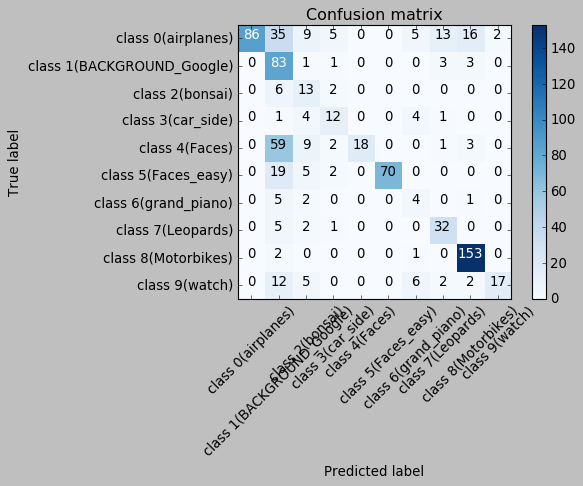

In [64]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()



In [65]:
# Saving and loading model and weights
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

model.save('model.hdf5')
loaded_model=load_model('model.hdf5')

Saved model to disk
Loaded model from disk


<p style="font-size:1em; color:blue; ">///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</p>

# Checking The prediction

In [78]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)




In [101]:
test_imag1 = image.load_img('/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/CUTE 4/10_categories 2/Motorbikes/image_0009.jpg', target_size = (224, 224))

#test_image1 = load_image_into_numpy_array(test_image1)
test_ima1 = load_image_into_numpy_array(test_imag1)
test_ima2 = np.expand_dims(test_ima1, axis = 0)
result1 = model.predict(test_ima2)



In [102]:
print(result1)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


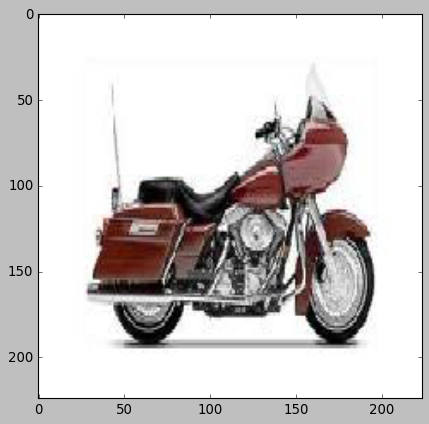

In [103]:
from matplotlib import pyplot as plt
plt.imshow(test_ima1)

<p style="font-size:1em; color:blue; ">///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</p>

# Actual Test Image

In [105]:
Ori_test_imag = image.load_img('/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/CUTE 4/test_image-1551435475921 2.jpg', target_size = (224, 224))

#test_image1 = load_image_into_numpy_array(test_image1)
test_imaO = load_image_into_numpy_array(Ori_test_imag)
test_imaO1 = np.expand_dims(test_imaO, axis = 0)
resultO = model.predict(test_imaO1)
print(resultO)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


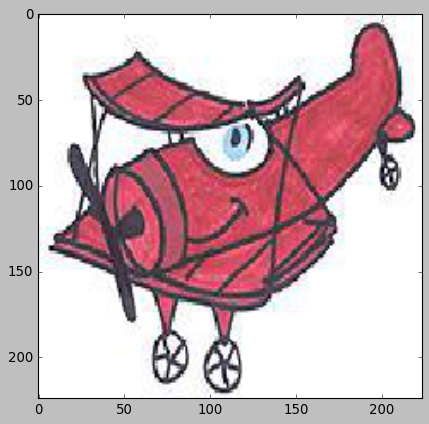

In [106]:
plt.imshow(test_imaO)

<p style="font-size:1em; color:blue; ">///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</p>

In [111]:
test_imagL = image.load_img('/Users/priyavivekbhandarkar/Desktop/INSOFE/IMG-20190317-WA0004.jpg', target_size = (224, 224))

#test_image1 = load_image_into_numpy_array(test_image1)
test_imaLP = load_image_into_numpy_array(test_imagL)
test_imaLPT = np.expand_dims(test_imaLP, axis = 0)
resultLPT = model.predict(test_imaLPT)
print(resultLPT)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


<p style="font-size:1em; color:blue; ">///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</p>

In [115]:
test_imagGP = image.load_img('/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/CUTE 4/10_categories 2/grand_piano/image_0012.jpg', target_size = (224, 224))

#test_image1 = load_image_into_numpy_array(test_image1)
test_ima12 = load_image_into_numpy_array(test_imagGP)
test_ima23 = np.expand_dims(test_ima12, axis = 0)
result13 = model.predict(test_ima23)

print(result13)


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


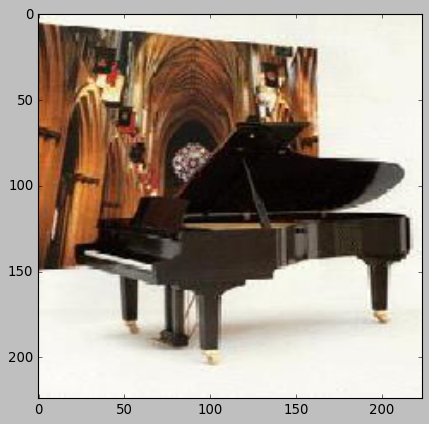

In [116]:
plt.imshow(test_ima12)

<p style="font-size:1em; color:blue; ">///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</p>

In [108]:
# Testing a new image
test_image1 = cv2.imread('/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/CUTE 4/test_image-1551435475921 2.jpg')
test_image1 = cv2.cvtColor(test_image1, cv2.COLOR_BGR2GRAY)
test_image1 = cv2.resize(test_image1,(224, 224))
test_image1 = np.array(test_image1)
test_image1 = test_image1.astype('float32')#test_image
test_image1 /= 255
print (test_imageT.shape)



(1, 224, 224, 3)


In [69]:
# Predicting the test image
print((model.predict(test_image1)))
print(model.predict_classes(test_image1))


[[0.09 0.12 0.11 0.09 0.09 0.09 0.1  0.12 0.08 0.1 ]]
[1]


In [57]:
predictions_test = model.predict(test_image1)

predictions_test[0]

array([0.08963227, 0.12454679, 0.11370464, 0.09412284, 0.09481426,
       0.09124438, 0.10129056, 0.11606208, 0.07947956, 0.09510269],
      dtype=float32)

In [58]:
np.argmax(predictions_test[0])

1